<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장: 회귀 알고리즘과 모델 규제: 농어의 무게를 예측하라!

## 3-1 k-최근접 이웃 회귀

지난번까지 했던 건 길이와 무게로부터 분류Classify 하는 것

즉, 주어진 특성값feature으로부터 class를 찾아가는 것

이번에 할 것은 특성값으로 다른 특성값을 유추하는 것 -> 회귀

**분류: 비슷한 것들끼리는 비슷한 특성값을 가질 것이다.**

**회귀: 비슷한 것들끼리는 특성값의 관계도 비슷할 것이다.**

\\

훈련 데이터로 농어perch의 길이와 무게 56개가 있음

새로운 길이가 들어왔을 때 무게를 추정하고자 함

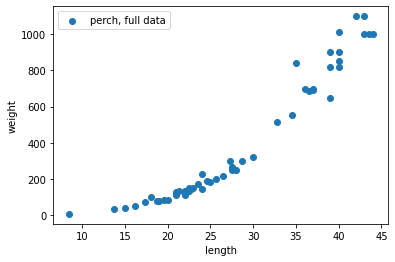

In [2]:
import numpy as np

# perch data from bit.ly/perch_data
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight, label='perch, full data')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

우선 전체 데이터를 훈련 세트와 테스트 세트로 나누고

np.reshape으로 크기를 맞춰줌

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 사이킷런에 입력하는 훈련 세트는 행 방향으로 각 샘플이 들어감
# 즉, 훈련 세트의 행 개수가 샘플 개수와 같아야 함
# numpy의 reshape을 이용해서 해결

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)